CODE BLOCK: 1

In [4]:
from utils import train_data, test_data, find_lr
from model import CustomResNet
from torch.utils.data import DataLoader
from train import train_custom_resnet
import torch

CUDA & SEED

In [5]:
SEED = 42

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

device = torch.device("cuda" if cuda else "cpu")

CUDA Available? False


Load data using functions in utils and parameters including batch size of 512

In [6]:
# dataloader arguments
dataloader_args = dict(shuffle=True, batch_size=512, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

test_loader = DataLoader(test_data(), **dataloader_args)
train_loader = DataLoader(train_data(), **dataloader_args)

 12%|█▏        | 20119552/170498071 [00:06<00:48, 3078780.63it/s]


KeyboardInterrupt: 

Visualizing training data

C:\Users\01889W744\AppData\Local\Temp\ipykernel_38744\976560796.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


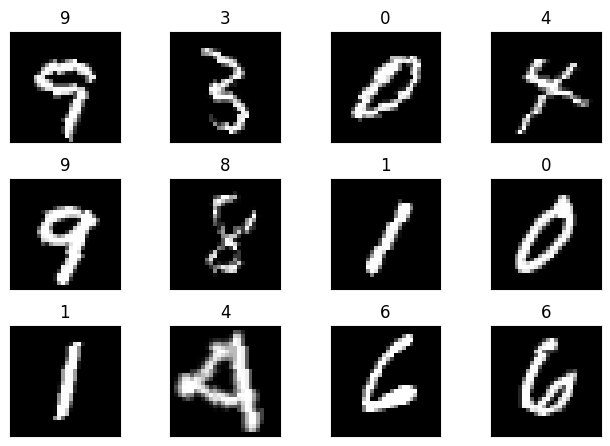

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

import torchvision
# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

Find LR (Leslie N. Smith approach)

In [ ]:
model = CustomResNet().to(device)
optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

find_lr(model = model,
        optimizer = optimizer,
        criterion = criterion,
        train_loader=train_loader,
        test_loader=test_loader,
        device=device)

Train model for 24 epochs and log accuracy levels

In [ ]:
lr_max=1.83e-02
# Train the custom ResNet model
train_custom_resnet(
    model = model,
    optimizer = optimizer,
    criterion = criterion,
    train_loader=train_loader,
    test_loader=test_loader,
    num_epochs=24,
    max_at_epoch=5,
    # lr_min=1e-4,
    lr_max=lr_max,
    device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
)

CODE BLOCK: 7

In [6]:
model = CustomResNet().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 2

CODE BLOCK: 8

In [7]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

# test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9
This block is now shifted to utils.py file and functions in next block call functions train and test from there.

CODE BLOCK: 10

In [12]:
model = Net().to(device)
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc, train_losses = train(model, device, train_loader, optimizer(model), criterion(), train_losses, train_acc)
  test_acc, test_losses = test(model, device, test_loader, criterion(), test_losses, test_acc)
  scheduler(model).step()

Epoch 1


  0%|          | 0/118 [00:00<?, ?it/s]

Train: Loss=2.2978 Batch_id=9 Accuracy=11.58:   8%|▊         | 10/118 [00:28<02:33,  1.42s/it]

CODE BLOCK: 11

In [ ]:
# Plot the training and test accuracy and loss
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

summary(model, input_size=(1, 28, 28))